In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Data was sourced from https://www.tellusgb.ac.uk/data/airborneGeophysicalSurvey.html -> radiometrics_data.csv

df = pd.read_csv("../data/TellusSW_RAD_ALL.csv")
df

,X_BNG,Y_BNG,flight,date,Line,altimeter,processed_total_count,processed_potassium,processed_uranium,processed_thorium
0,132050.74,40394.00,2,2013/08/01,1010,123.10,37.11,-0.03,0.02,-0.09
1,132046.44,40327.55,2,2013/08/01,1010,122.14,41.10,-0.05,0.03,0.15
2,132041.89,40261.11,2,2013/08/01,1010,121.16,55.59,-0.01,-0.04,0.27
3,132037.35,40194.66,2,2013/08/01,1010,118.78,54.03,-0.01,0.05,0.01
4,132032.70,40128.41,2,2013/08/01,1010,117.09,58.01,-0.06,0.25,0.02
...,...,...,...,...,...,...,...,...,...,...
853316,286927.62,153449.39,38,2013/09/05,90740,79.64,193.01,0.21,0.08,1.71
853317,287006.24,153448.95,38,2013/09/05,90740,81.68,193.90,0.22,0.05,1.66
853318,287084.86,153448.51,38,2013/09/05,90740,82.02,197.85,0.22,0.22,1.24
853319,287163.36,153447.89,38,2013/09/05,90740,83.49,201.86,0.17,0.30,1.44


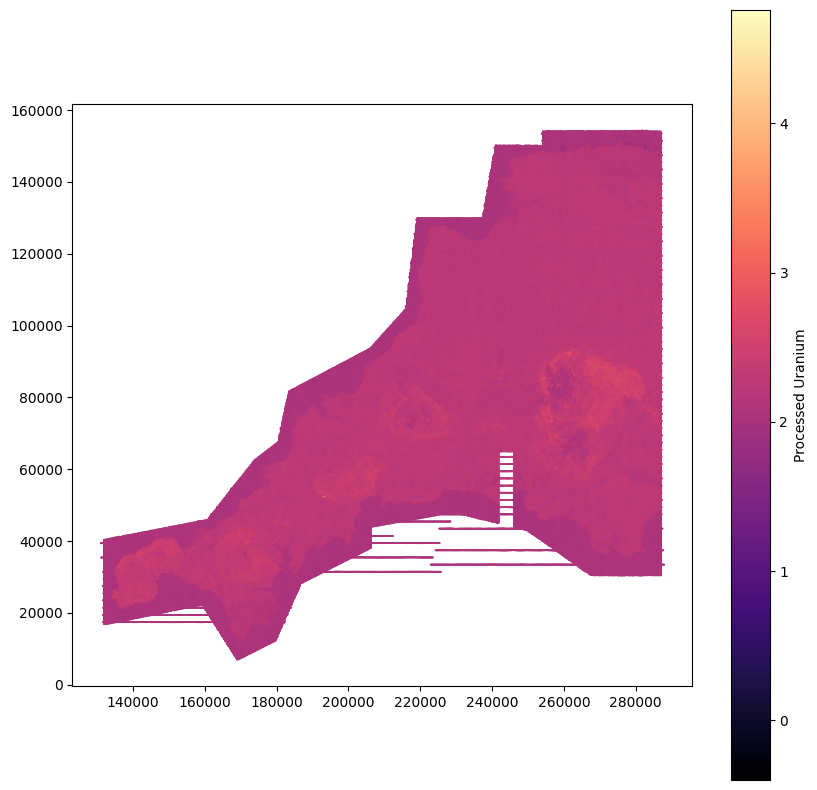

In [8]:
# Normal plotting test - removing outliers and plotting logarithmically on a scatter plot

u = df["processed_uranium"]
u_log = np.log1p(u-u.min())
umin, umax = np.percentile(u, [1,99])

plt.figure(figsize=(10,10))
plt.scatter(df["X_BNG"],df["Y_BNG"],c=u_log,s=0.1,cmap="magma",vmin=umin,vmax=umax)
plt.colorbar(label="Processed Uranium")
plt.gca().set_aspect("equal","box")
plt.show()

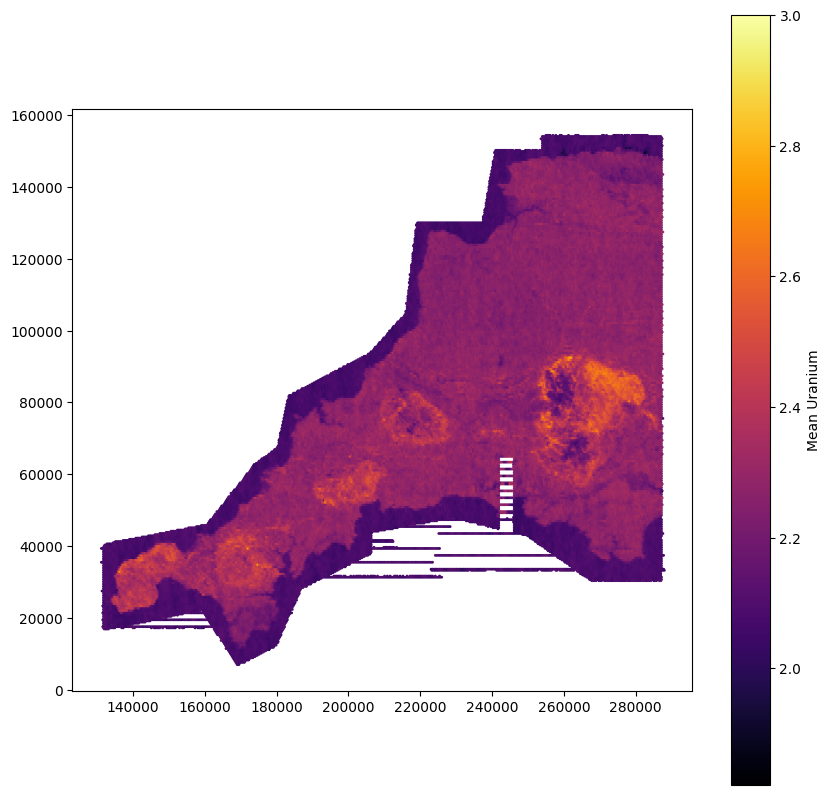

In [16]:
# Plotting on a hexbin instead of a scatter for a lot more visible detail

x = df["X_BNG"]
y = df["Y_BNG"]
u = df["processed_uranium"]
u_log = np.log1p(u-u.min())

# I removed the outermost 1% outliers, but later thought it's possible the readings really were just high and it might be relevant to see.
# Also with the hexbins it takes the average values in an area so they're less impactful.
umin, umax = np.percentile(u, [1,99])

plt.figure(figsize=(10,10))
hb = plt.hexbin(
    x, y,
    C=u_log,
    reduce_C_function=np.mean,
    gridsize=400, # You can increase this for a much finer grid - it just runs slower.
    cmap="inferno"
)
plt.colorbar(hb, label="Mean Uranium")
plt.gca().set_aspect("equal", "box")
plt.show()


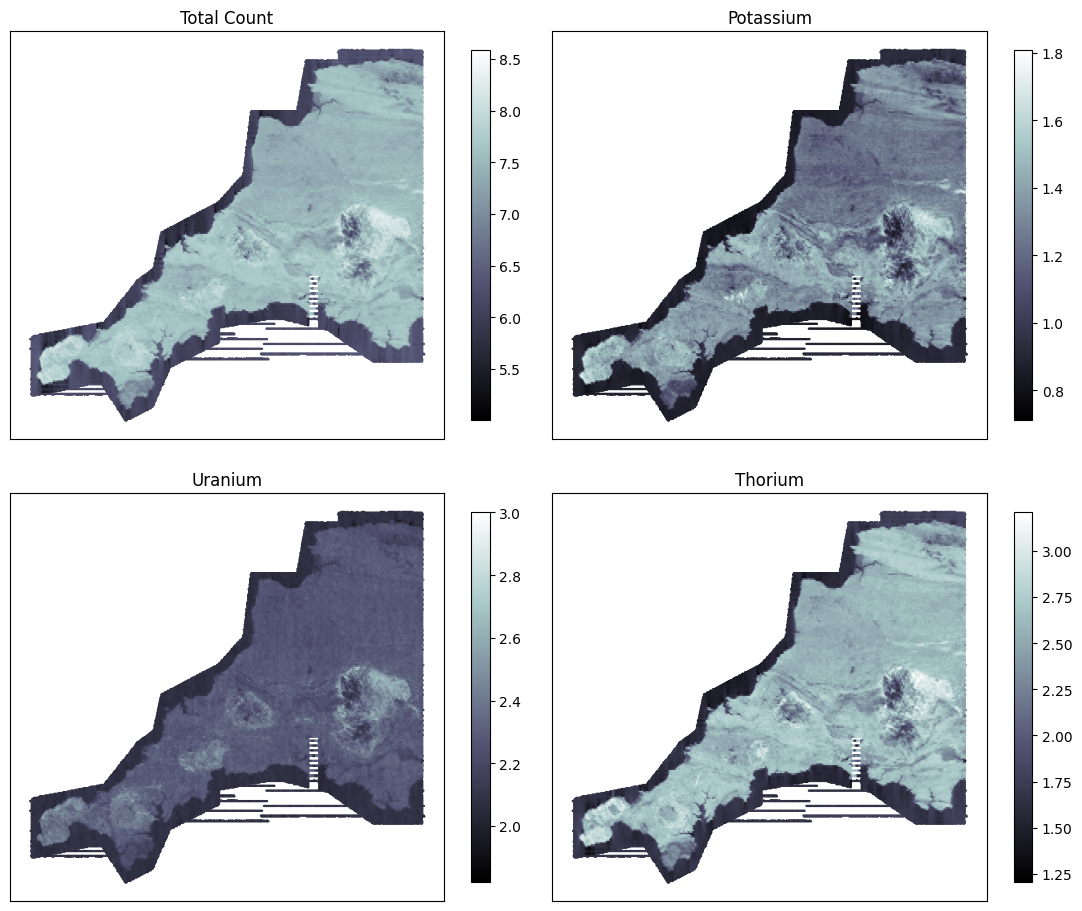

In [10]:
# Very pretty! Annoying about that weird gap though.
# Plotting each of the different elements

fields = {
    "processed_total_count": "Total Count",
    "processed_potassium": "Potassium",
    "processed_uranium": "Uranium",
    "processed_thorium": "Thorium",
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, (col, label) in zip(axes, fields.items()):
    values = df[col].values
    values = np.log1p(values - values.min())

    sc = ax.hexbin(df["X_BNG"],df["Y_BNG"],C=values,reduce_C_function=np.mean,gridsize=400,cmap="bone")
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)
    ax.set_aspect("equal", "box")
    
    plt.colorbar(sc, ax=ax, shrink=0.8)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()